In [1]:
library("igraph")
library("ggplot2")



Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
network <- read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)

In [ ]:
#Question 8

In [31]:
coreNodes <- (which(neighborhood.size(network, 1, nodes=V(network))>201))

In [32]:
print(length(coreNodes))

[1] 40


In [33]:
aveCoreDeg <- mean(degree(network, v=V(network)[coreNodes]))
print(aveCoreDeg)

[1] 279.375


In [30]:
nodes = V(network)
core_nodes = 0
avg_core_deg = c()
for(i in nodes){
    lenth_neighbors = length(neighbors(network,i))
    if(lenth_neighbors > 200){
        avg_core_deg = c(avg_core_deg, degree(network, i))
        core_nodes = core_nodes + 1
    } 
}

print(paste('Question 8 - No. of core nodes:', (core_nodes)))
print(paste('Question 8 - average degree:', mean(avg_core_deg)))

[1] "Question 8 - No. of core nodes: 40"
[1] "Question 8 - average degree: 279.375"


id: 1 
   fast_greedy: 0.4131014 
   edge_betweenness: 0.3533022 


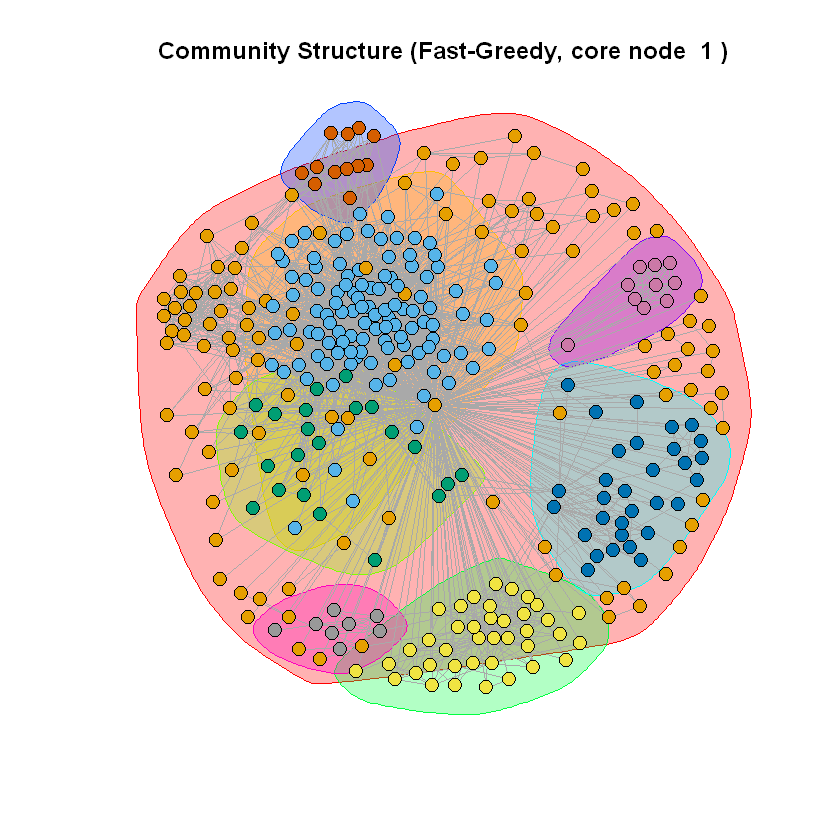

   infomap: 0.3891185 


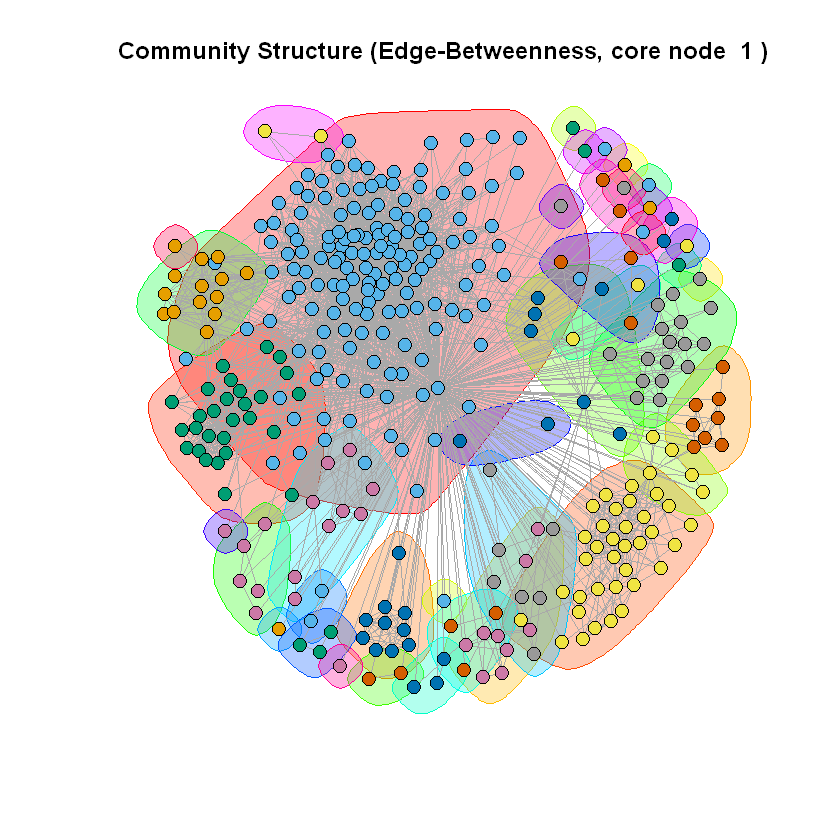


id: 108 
   fast_greedy: 0.4359294 


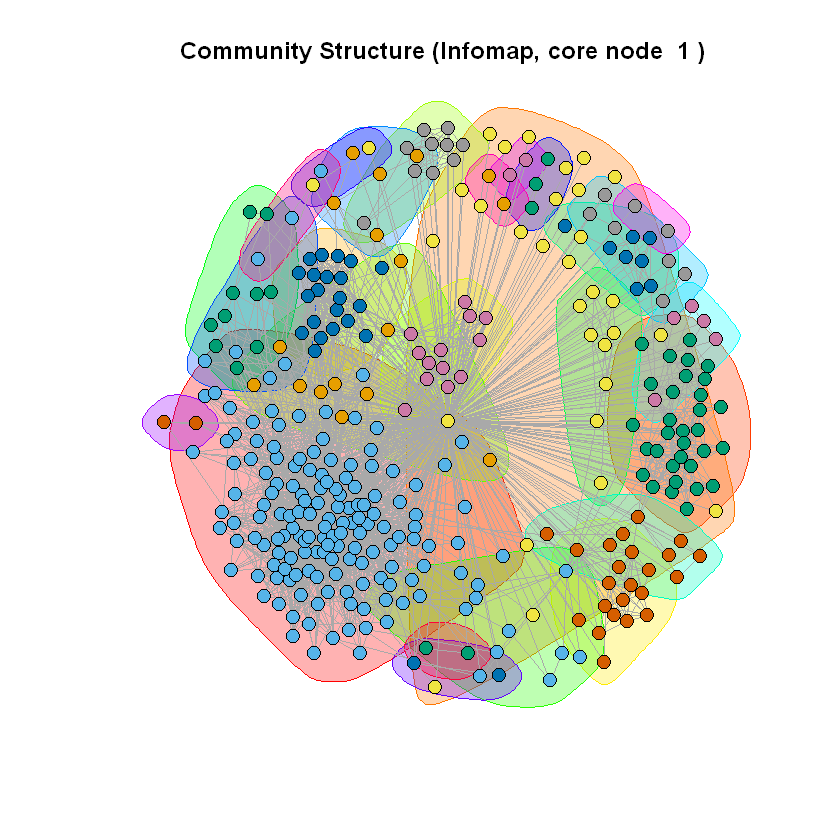

   edge_betweenness: 0.5067549 


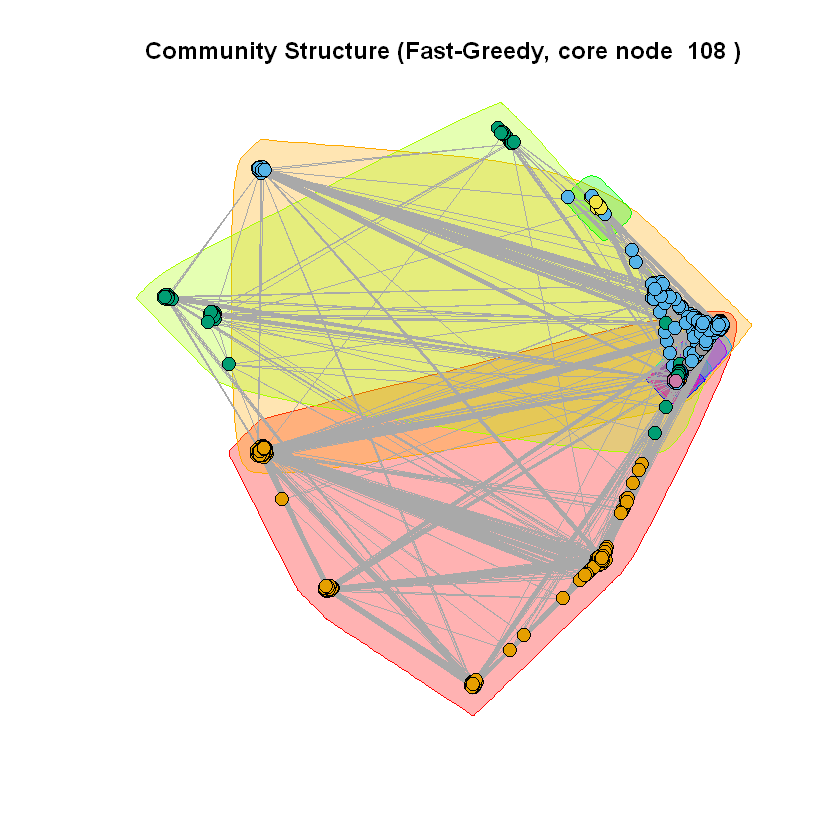

   infomap: 0.5082492 


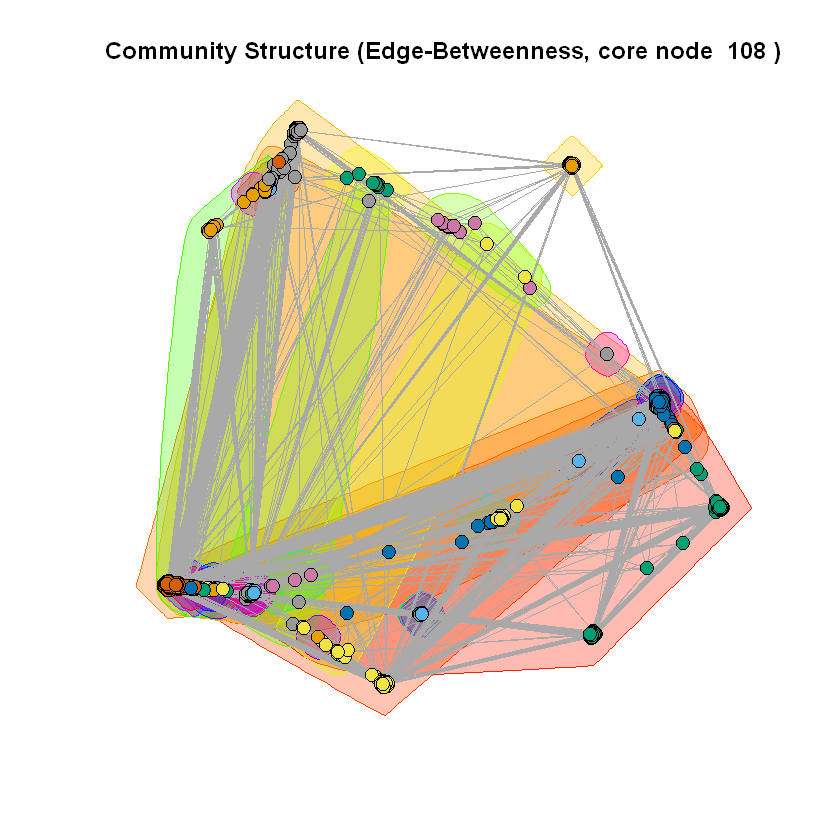


id: 349 
   fast_greedy: 0.2517149 


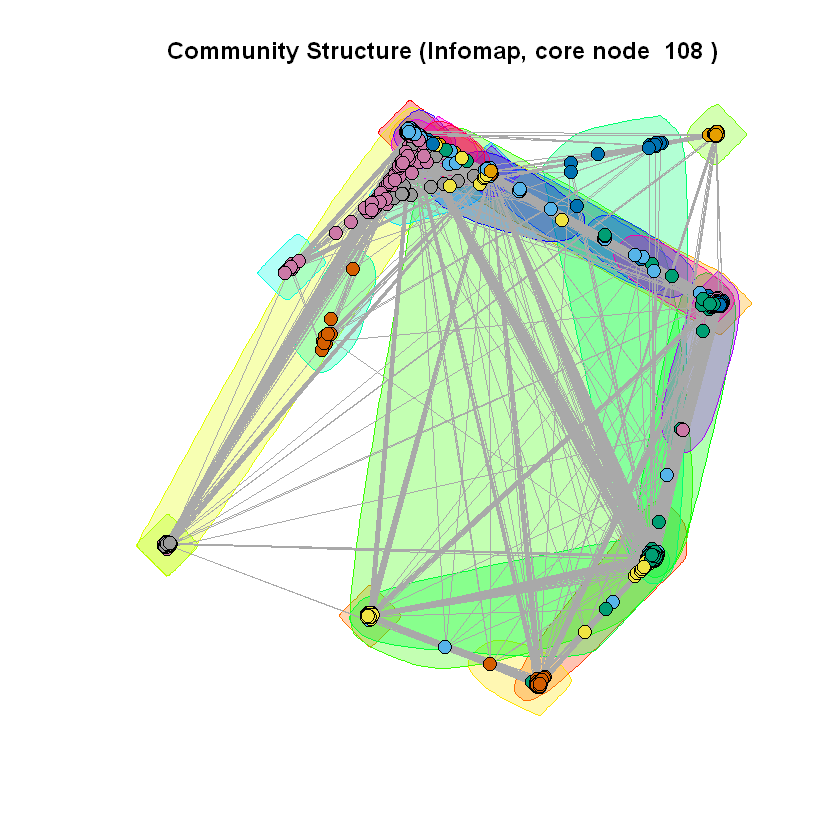

   edge_betweenness: 0.133528 


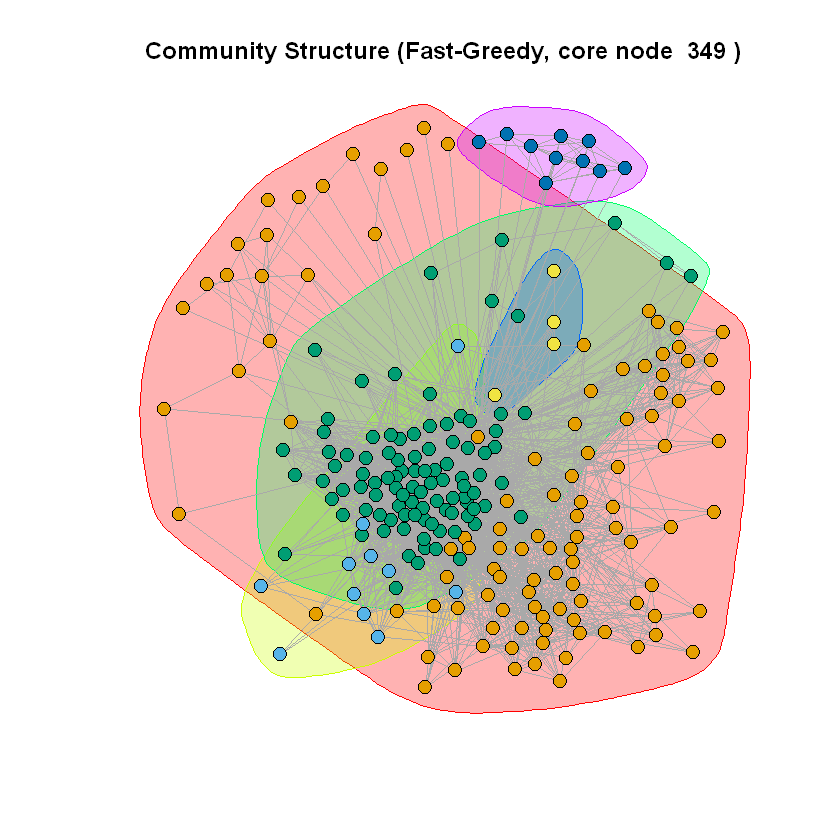

   infomap: 0.09602908 


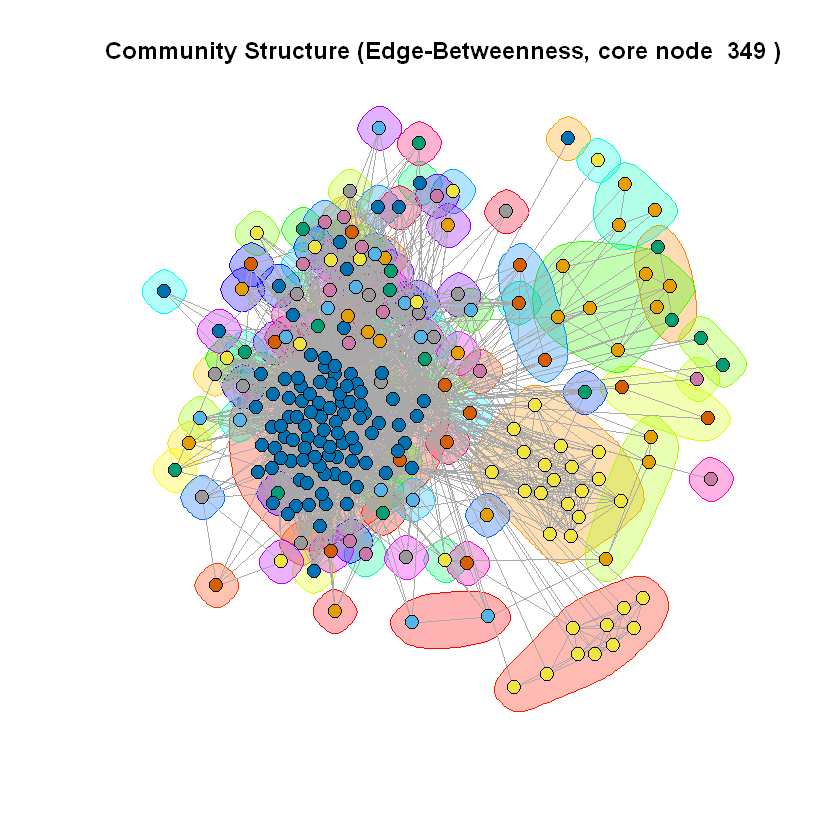


id: 484 
   fast_greedy: 0.5070016 


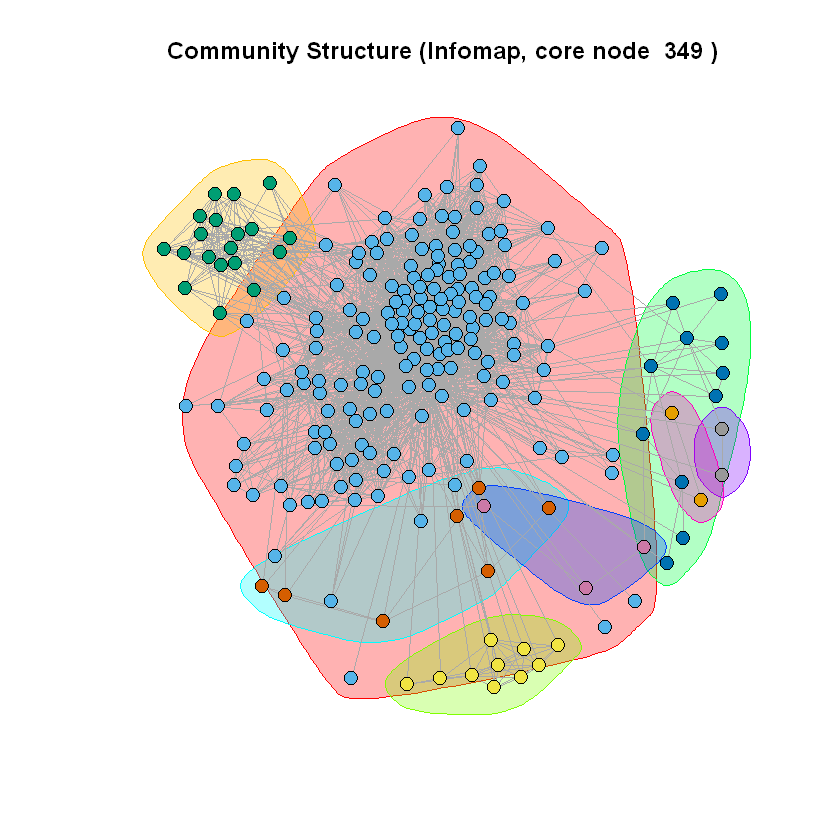

   edge_betweenness: 0.4890952 


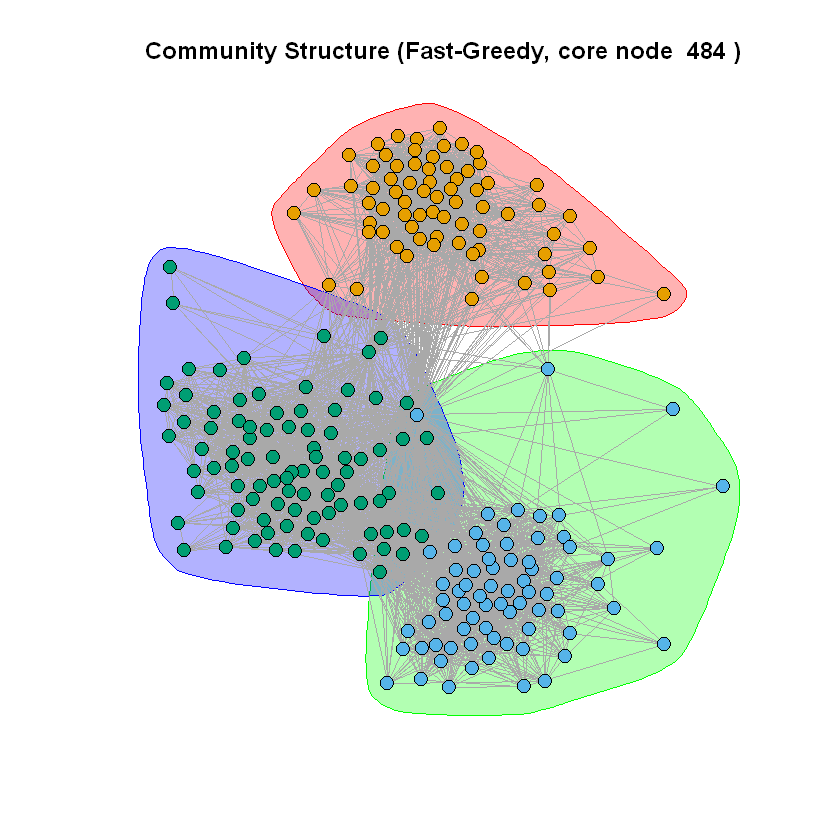

   infomap: 0.5152788 


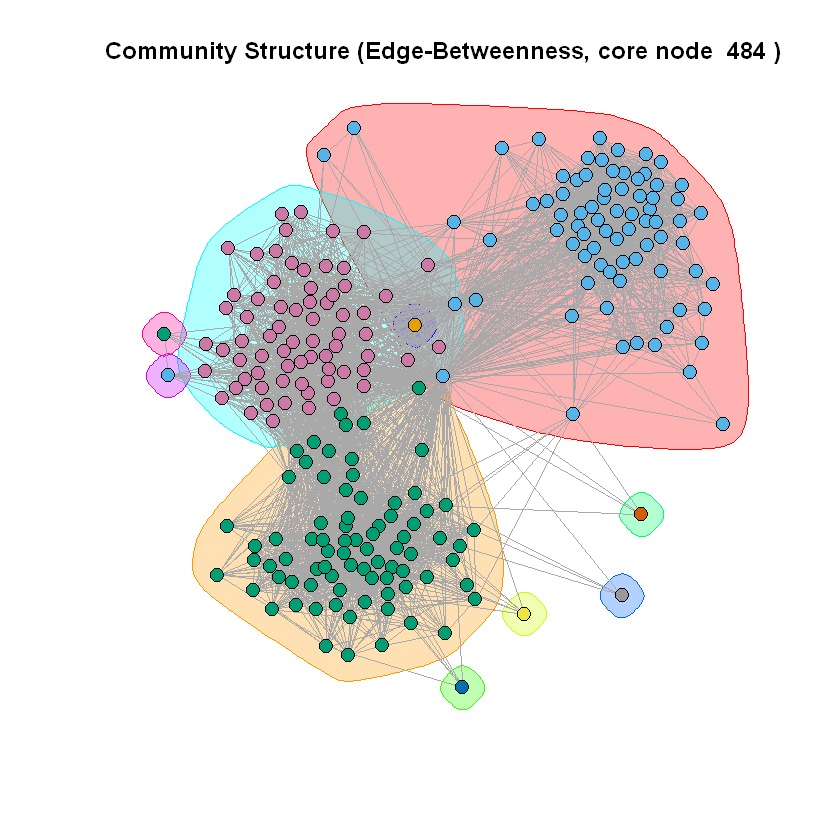


id: 1087 
   fast_greedy: 0.1455315 


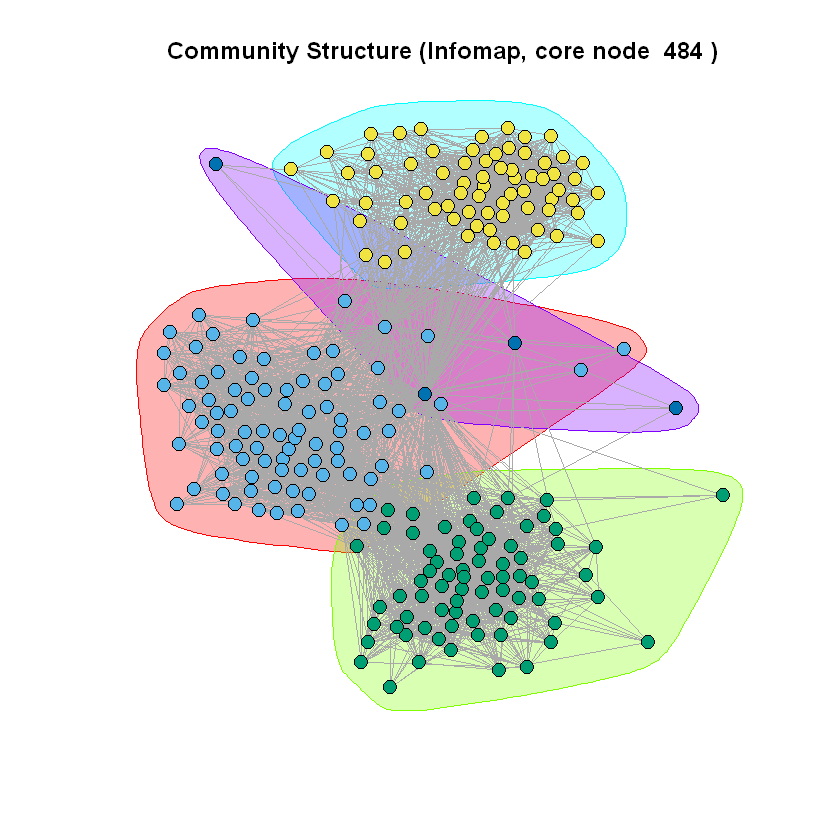

   edge_betweenness: 0.02762377 


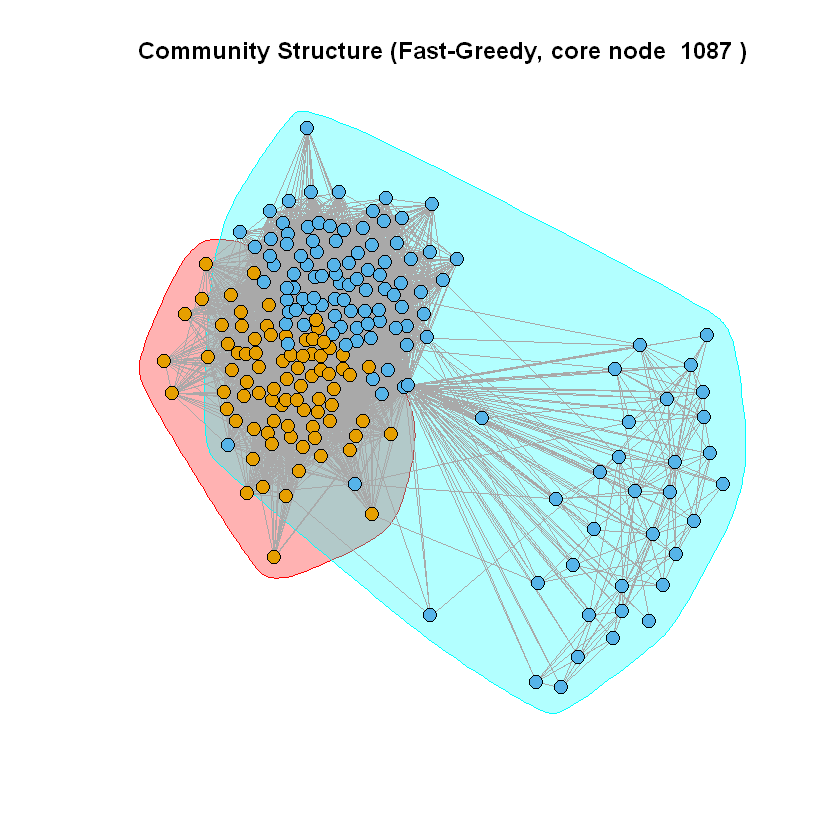

   infomap: 0.02690662 


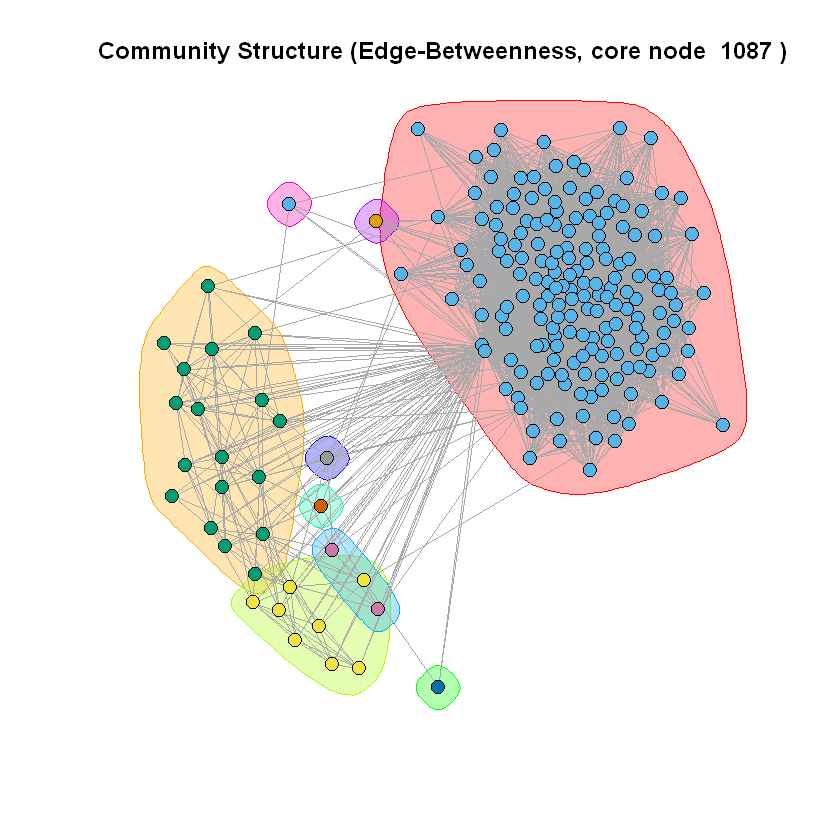

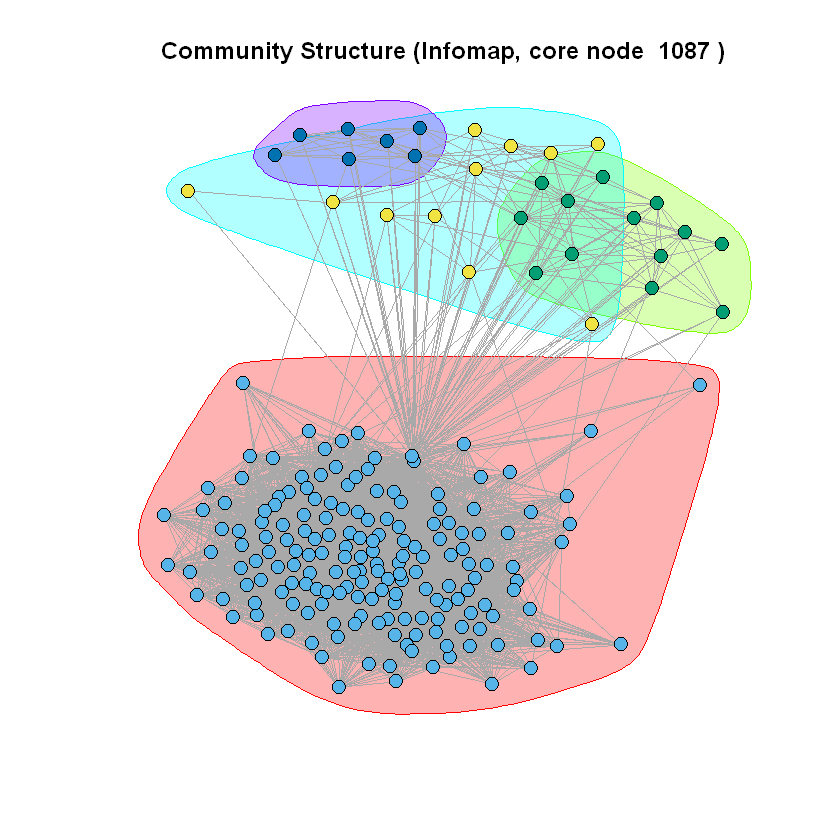

In [34]:
#Question 9
ids <- c(1, 108, 349, 484, 1087)
pnetworks <- make_ego_graph(network, 1, nodes=V(network)[ids])

for (i in 1:5) {
    cat("id:", ids[i], "\n")
    
    # 1 Fast-Greedy
    fc <- cluster_fast_greedy(pnetworks[[i]])
    cat("  ", "fast_greedy:", modularity(fc), "\n")
    # plot community structure
    fc_node_color <- fc$membership 
    plot(pnetworks[[i]], mark.groups=groups(fc), edge.arrow.size=.5, 
         vertex.color=fc_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Fast-Greedy, with core node ",ids[i],")",collapse=""))
    
    # 2 Edge-Betweenness
    ec <- cluster_edge_betweenness(pnetworks[[i]])
    cat("  ", "edge_betweenness:", modularity(ec), "\n")
    # plot community structure
    ec_node_color <- ec$membership + 1
    plot(pnetworks[[i]], mark.groups=groups(ec), edge.arrow.size=.5, 
     vertex.color=ec_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Edge-Betweenness, with core node ",ids[i],")",collapse=""))
    
    # 3 Infomap
    ic <- cluster_infomap(pnetworks[[i]])
    cat("  ", "infomap:", modularity(ic), "\n")
    # plot community structure
    ic_node_color <- ic$membership + 1
    plot(pnetworks[[i]], mark.groups=groups(ic), edge.arrow.size=.5, 
     vertex.color=ic_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Infomap, with core node ",ids[i],")",collapse=""))
    cat("\n")
}

id: 1 
   fast_greedy: 0.4418533 
   edge_betweenness: 0.4161461 


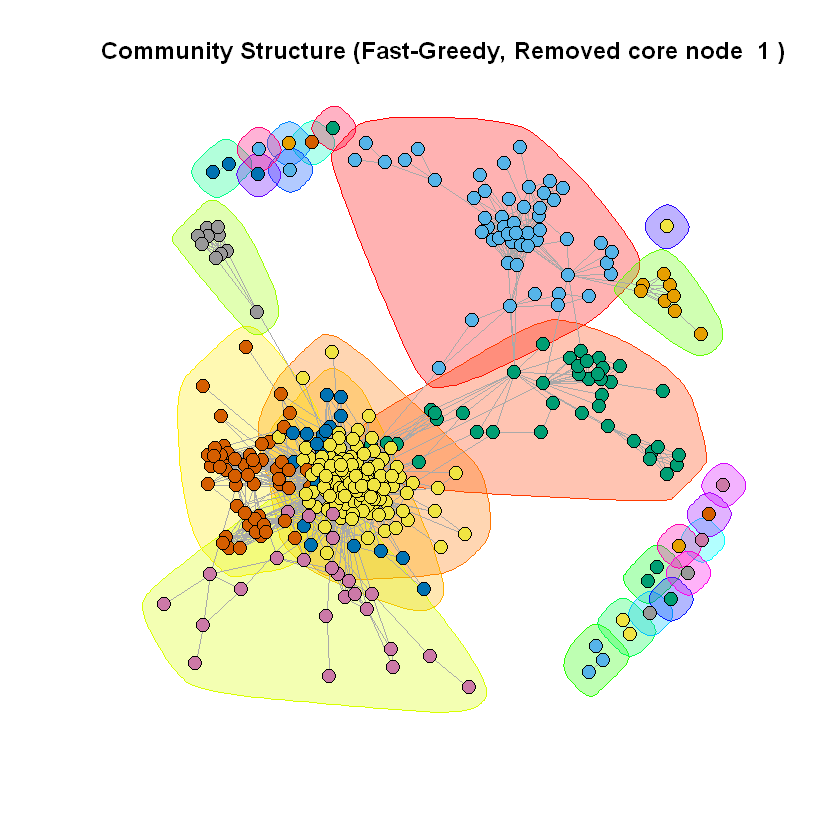

   infomap: 0.4180077 


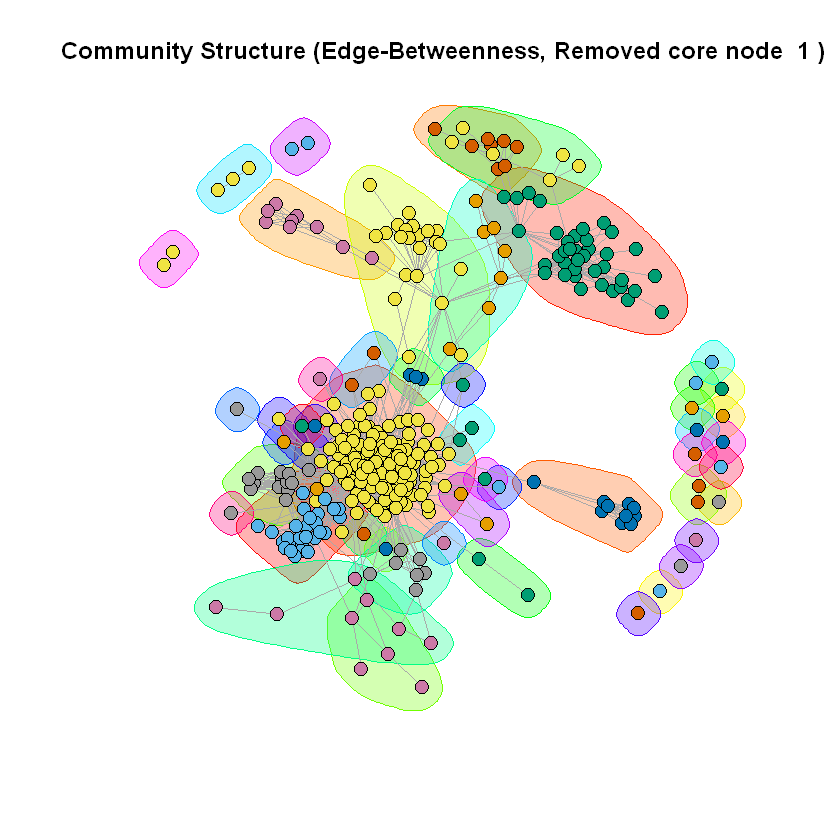


id: 108 
   fast_greedy: 0.4581271 


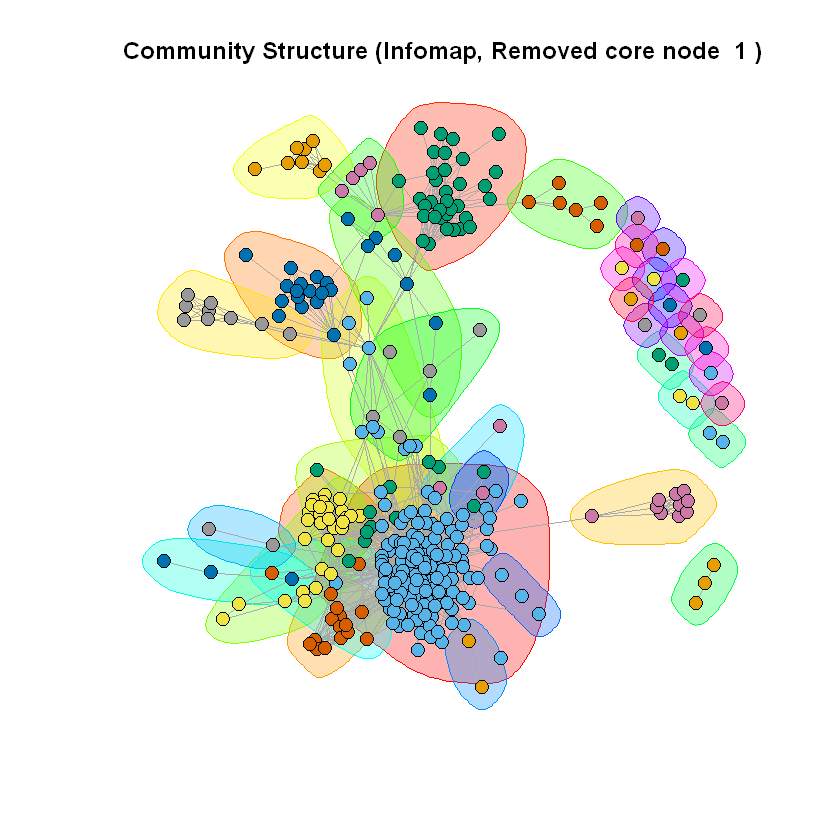

   edge_betweenness: 0.5213216 


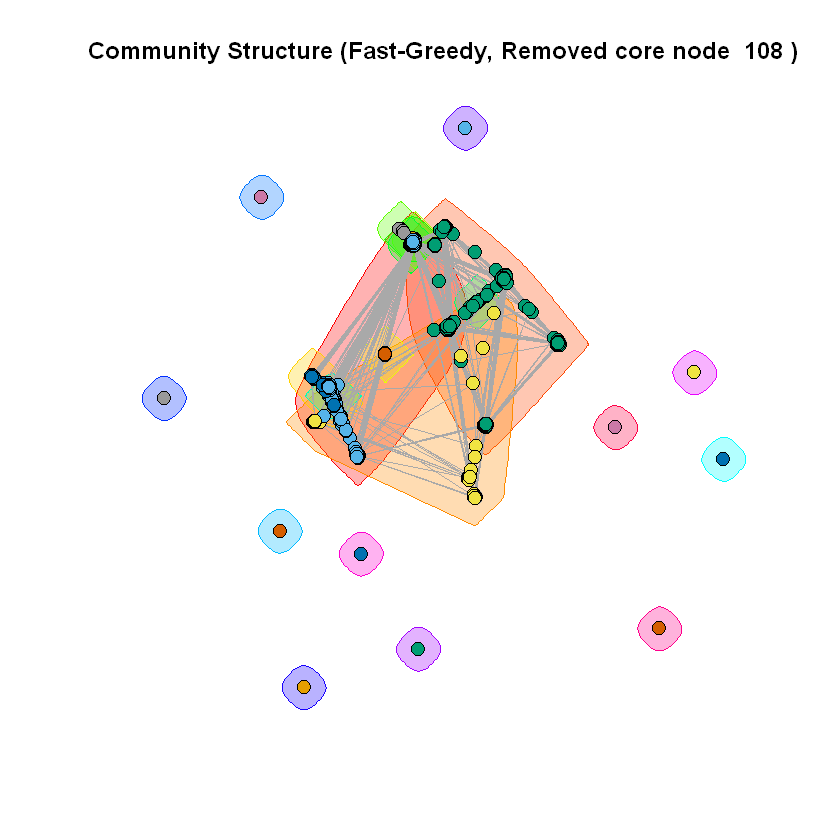

   infomap: 0.5181666 


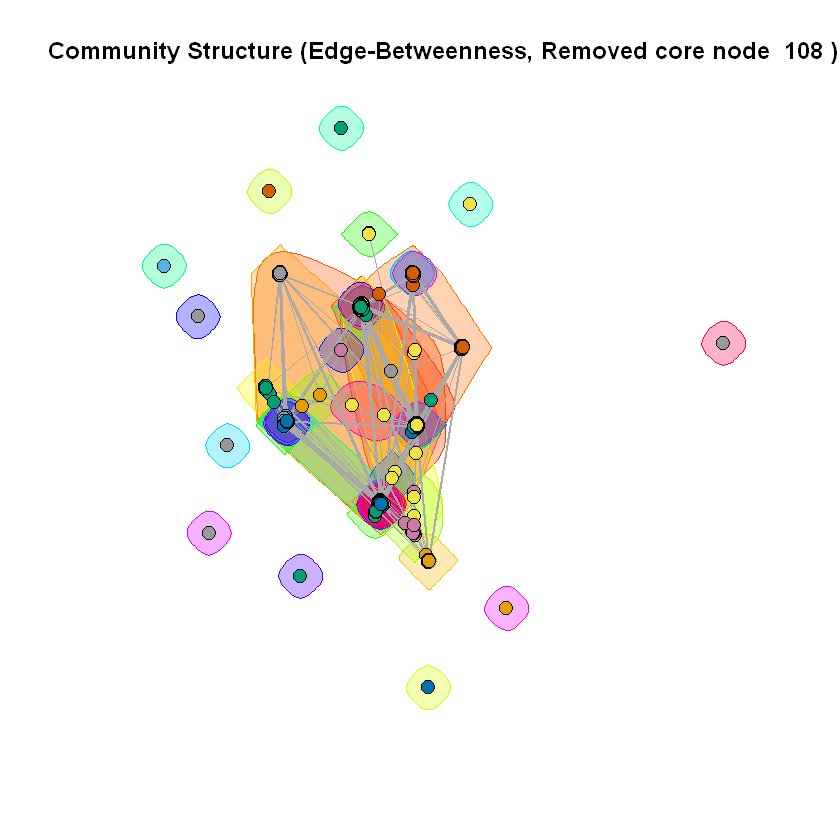


id: 349 
   fast_greedy: 0.2456918 


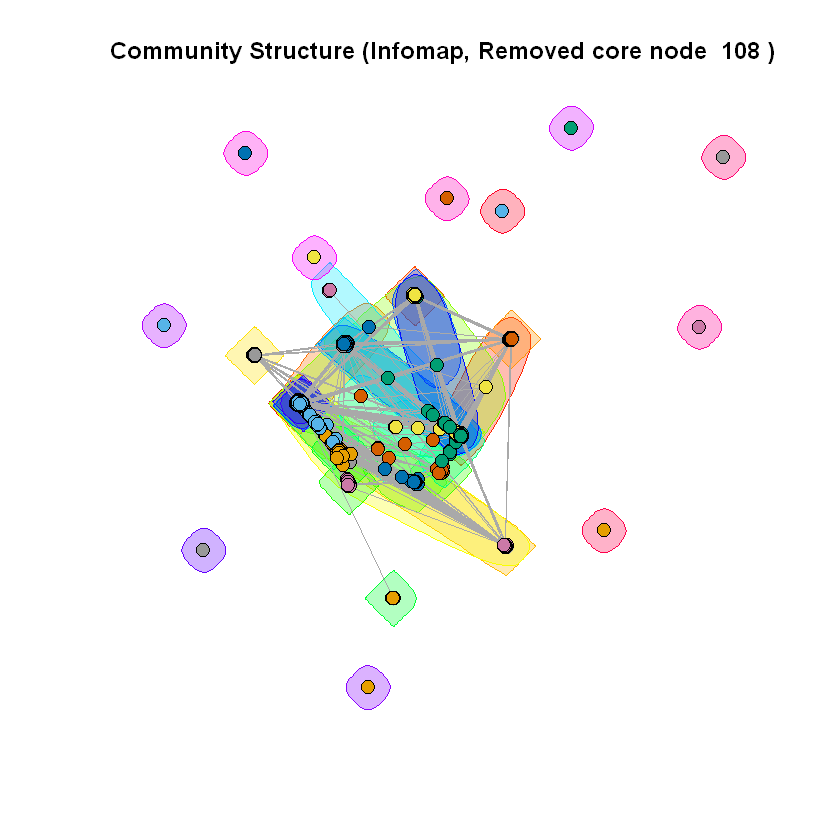

   edge_betweenness: 0.1505663 


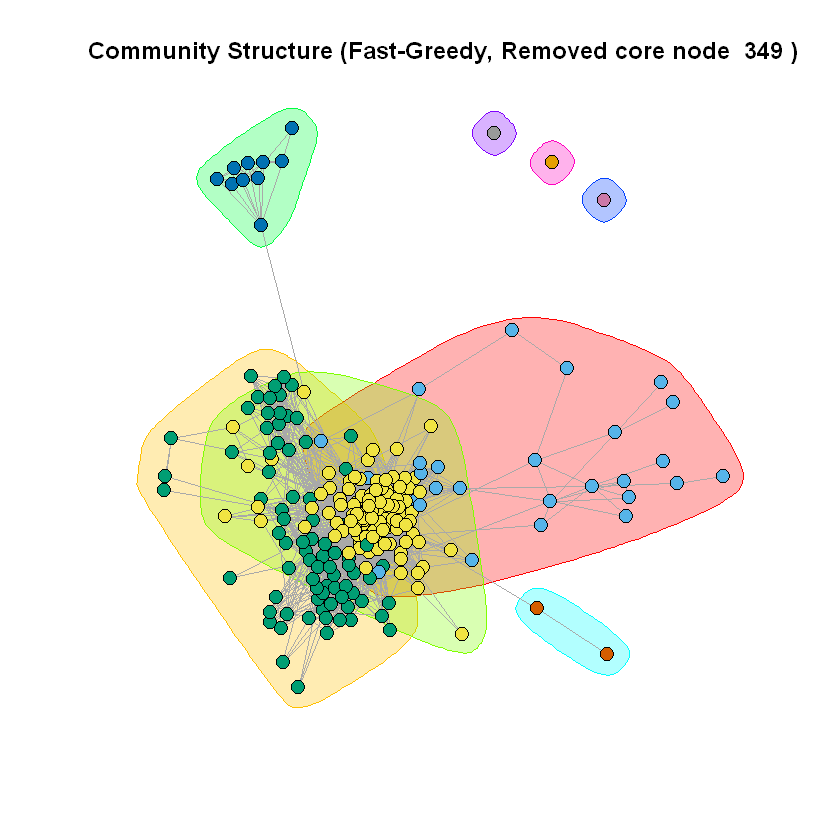

   infomap: 0.2448156 


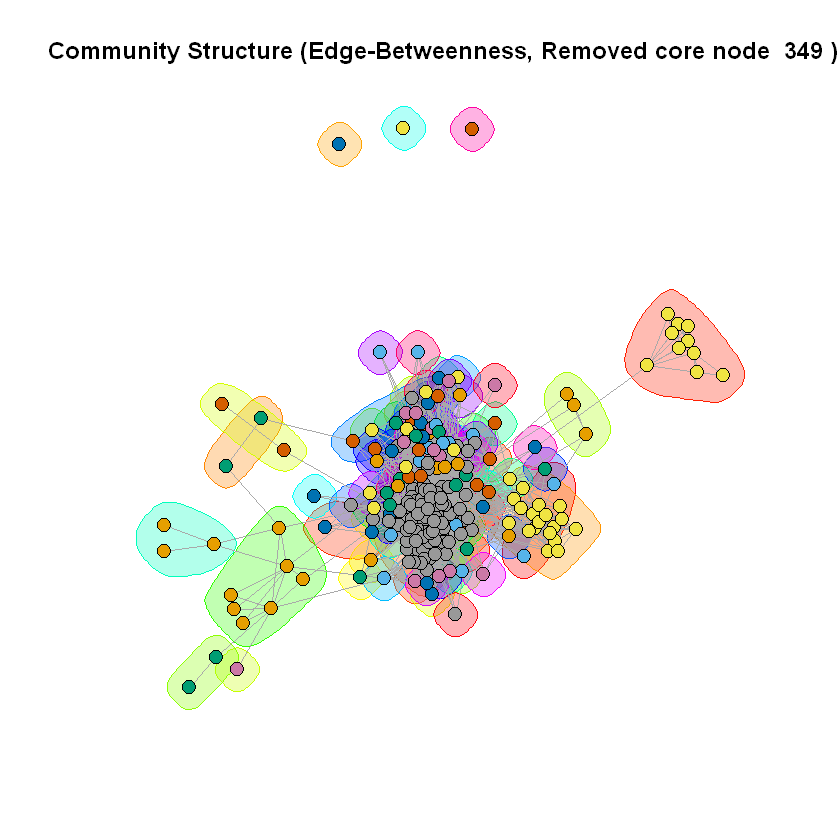


id: 484 
   fast_greedy: 0.5342142 


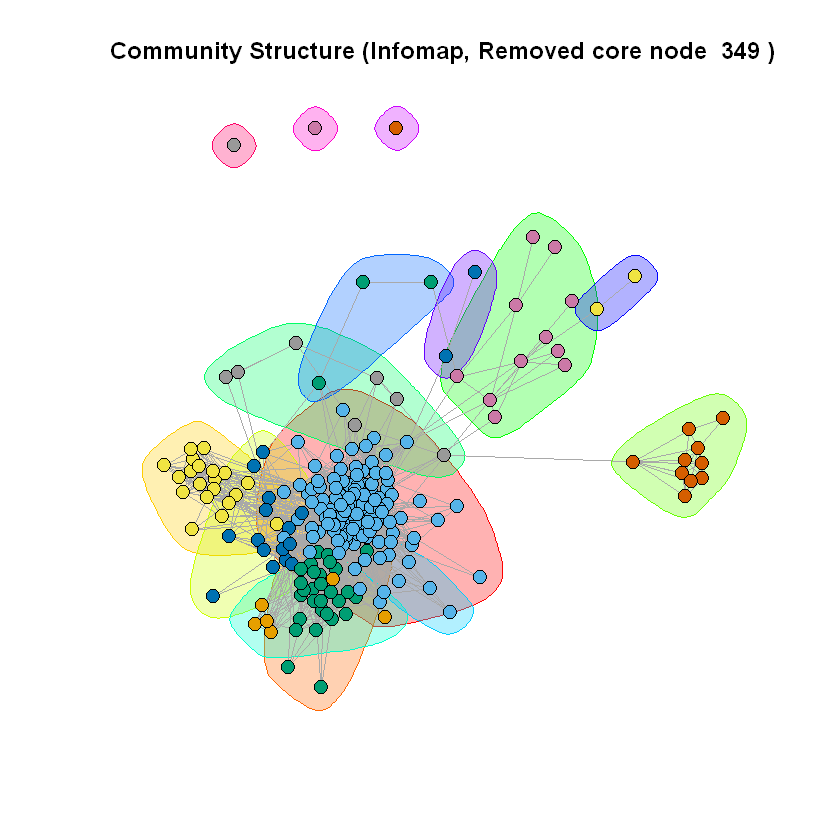

   edge_betweenness: 0.5154413 


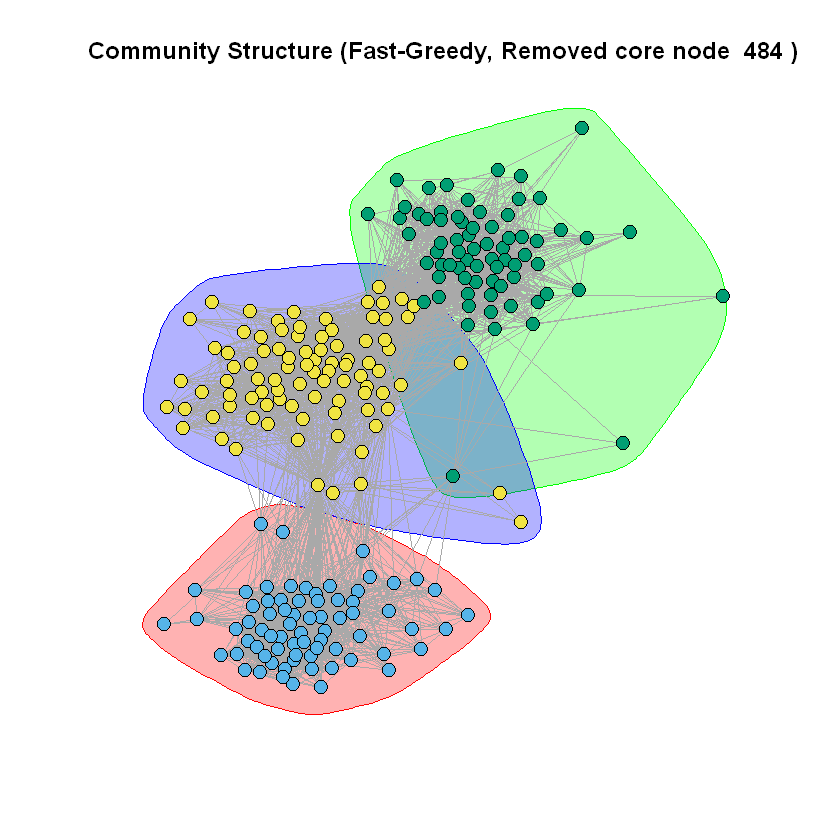

   infomap: 0.5434437 


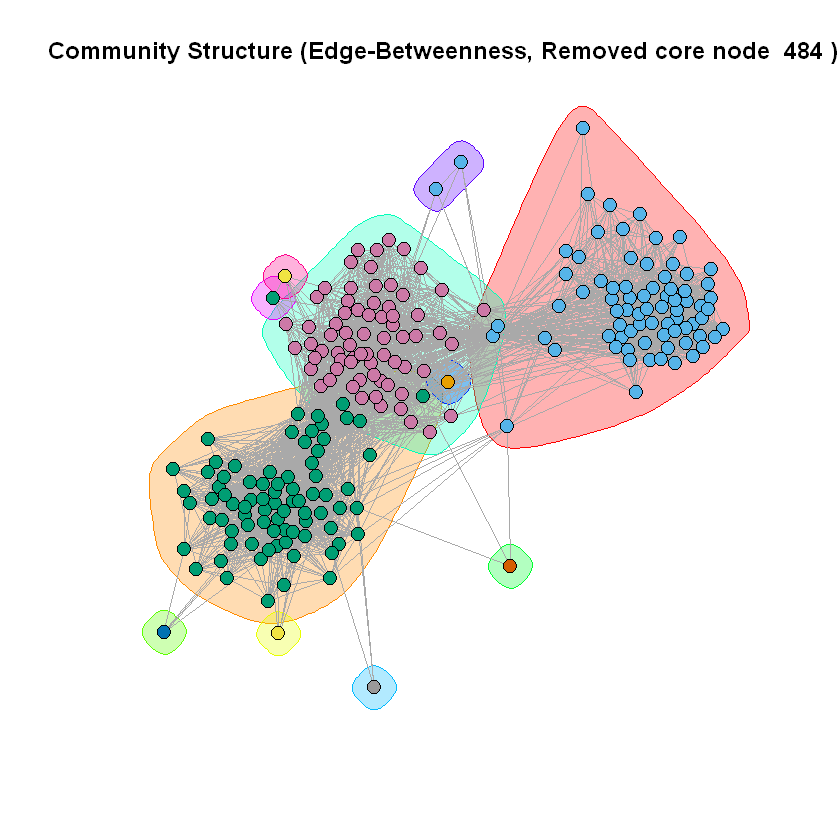


id: 1087 
   fast_greedy: 0.1481956 


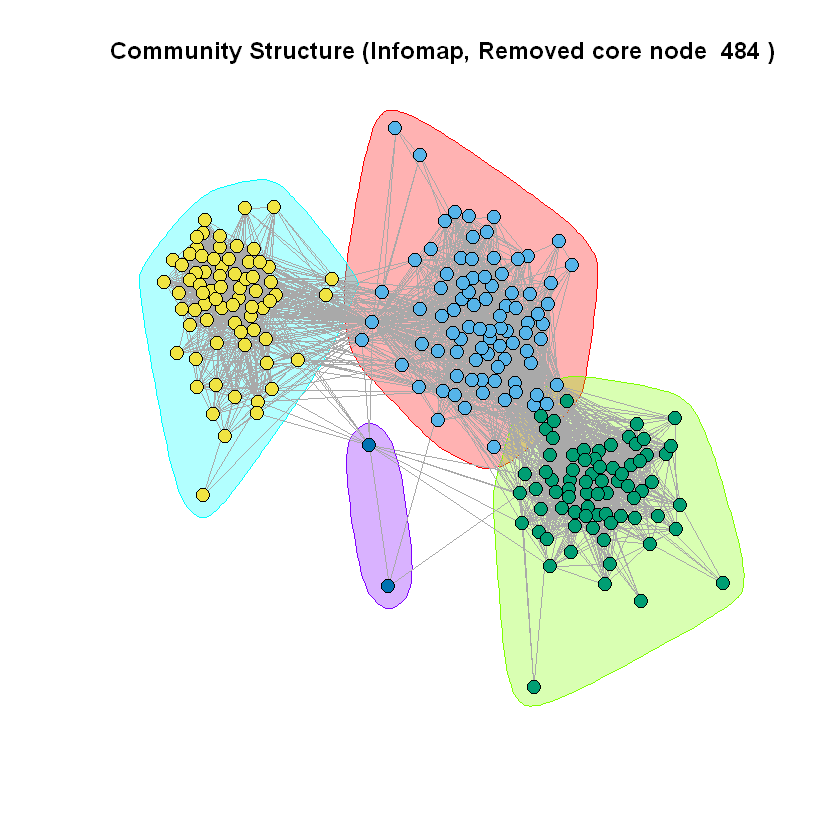

   edge_betweenness: 0.0324953 


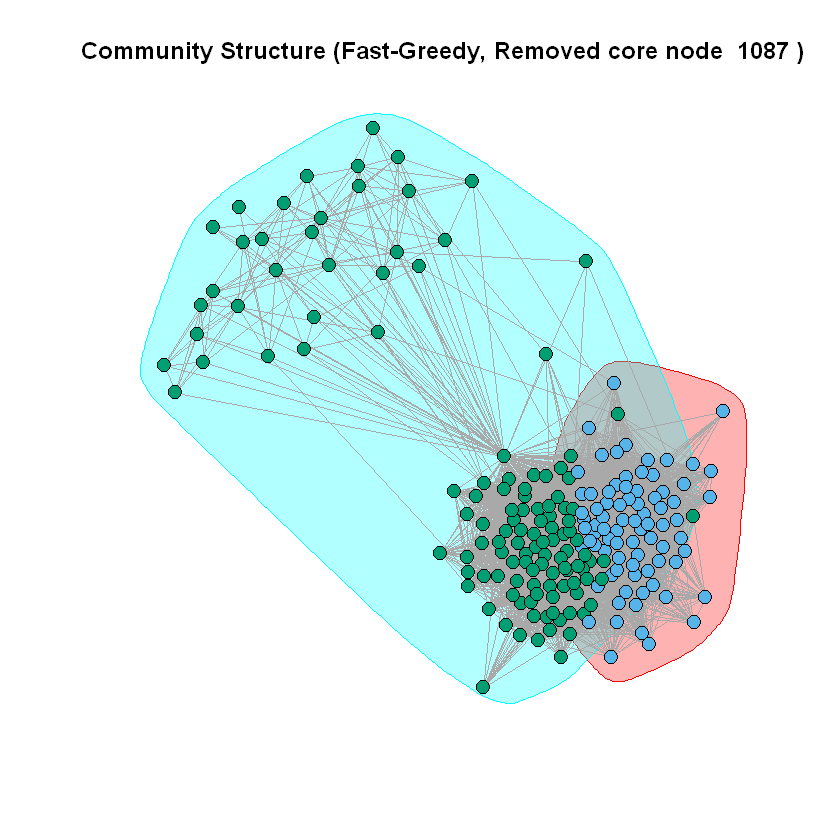

   infomap: 0.02737159 


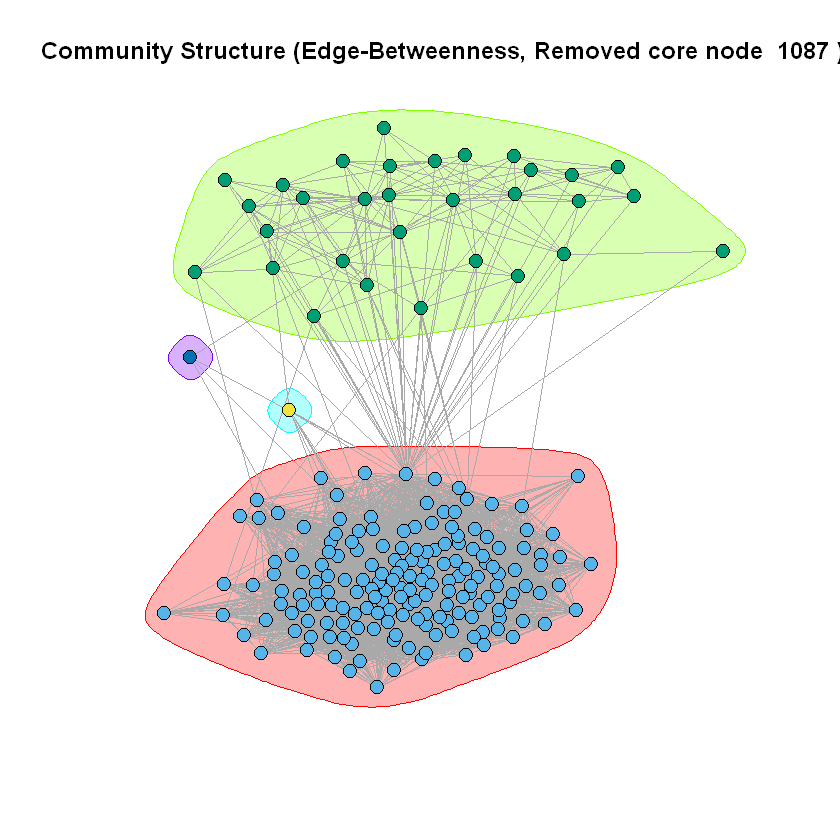

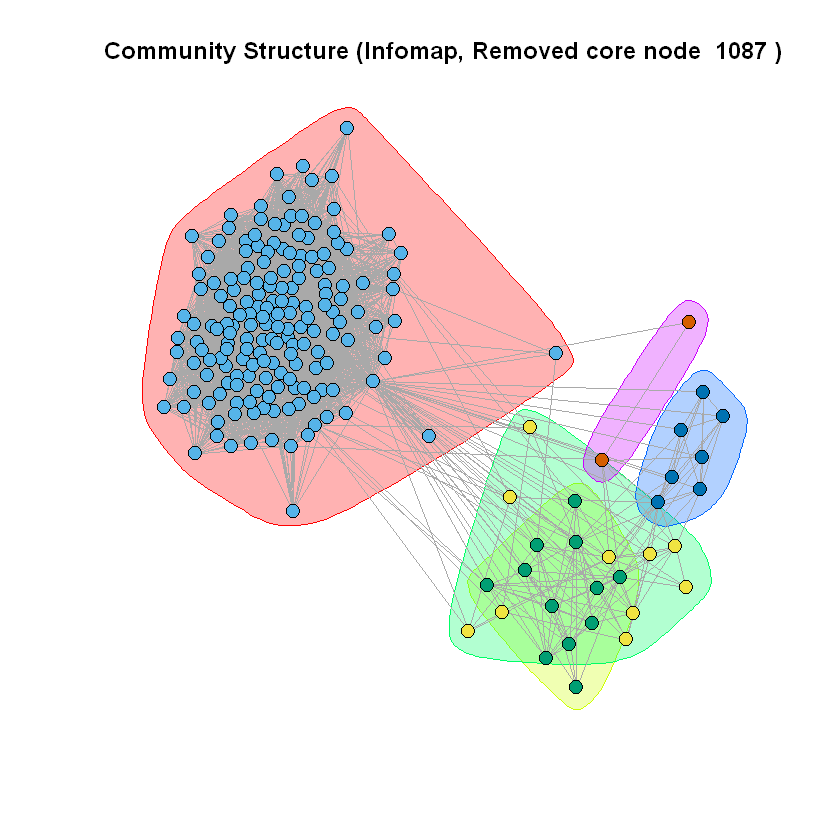

In [35]:
#Question 10
ids <- c(1, 108, 349, 484, 1087)

for (i in 1:5) {
    cat("id:", ids[i], "\n")
    subgraph <- induced_subgraph(network, neighbors(network, ids[i]))
    
    # 1 Fast-Greedy
    fc1 <- cluster_fast_greedy(subgraph)
    #cat("  ", "fast_greedy:", modularity(fc), "\n")
    cat("  ", "fast_greedy:", modularity(fc1), "\n")
    # plot community structure
    fc_node_color <- fc1$membership + 1
    plot(subgraph, mark.groups=groups(fc1), edge.arrow.size=.5, 
         vertex.color=fc_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Fast-Greedy, Removed core node ",ids[i],")",collapse=""))
    
    # 2 Edge-Betweenness
    ec1 <- cluster_edge_betweenness(subgraph)
    cat("  ", "edge_betweenness:", modularity(ec1), "\n")
    # plot community structure
    ec_node_color <- ec1$membership + 1
    plot(subgraph, mark.groups=groups(ec1), edge.arrow.size=.5, 
     vertex.color=ec_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Edge-Betweenness, Removed core node ",ids[i],")",collapse=""))
    
    # 3 Infomap
    ic1 <- cluster_infomap(subgraph)
    cat("  ", "infomap:", modularity(ic1), "\n")
    # plot community structure
    ic_node_color <- ic1$membership + 1
    plot(subgraph, mark.groups=groups(ic1), edge.arrow.size=.5, 
     vertex.color=ic_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure (Infomap, Removed core node ",ids[i],")",collapse=""))
    cat("\n")
}

In [ ]:
personalized_network <- function(core_node) {
    print("entered")
    subgraph_nodes <- c(core_node, neighbors(network, core_node))
    personal_network <- induced_subgraph(network, c(core_node, neighbors(network, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

In [36]:
#Question 11
core_nodes = c(1, 108, 349, 484, 1087)

mutual_friends <- function(graph, target, core) {
    neighbors_of_core_node <- neighbors(graph, core)
    neighbors_of_target <- neighbors(graph, target)
    
    #return(intersectiontarget_neighbors, core_neighbors)
    return(intersection(neighbors_of_core_node, neighbors_of_target))
}

embeddedness <- function(graph, target, core) {
    #return(mutual_friends(graph, core,target )))
    #return(mutual_friends(graph, target,core) ))
    
    return(length(mutual_friends(graph, target, core)))
}

dispersion <- function(graph, target, core) {
    
    #AllLabels <- V(graph)
    #target_label <- V(graph)[target]
    #core_label <- V(graph)[core]
    
    AllLabels <- V(graph)$label
    target_label <- V(graph)[target]$label
    core_label <- V(graph)[core]$label
    
    
    #labels <- vector()
    #for (label in AllLabels) {
    #    if (label != target_label & label != core_label) {
    #        labels <- label
    #    }
    #}
    
    
    labels <- c()
    for (label in AllLabels) {
        if (label != target_label & label != core_label) {
            labels <- c(labels, label)
        }
    }
    
    delete_graph <- delete_vertices(graph, c(core, target))
    V(delete_graph)$label <- sort(labels)
    #print(labels)
    
    mutual_friend <- mutual_friends(graph, target, core) 
    mutual_labels <- V(graph)[mutual_friend]$label
    #print(mutual_labels)
    vtoids <- c()
    "
    for (id in V(delete_graph)) {
        for (label in mutual_labels) {
            if (V(delete_graph)[id]$label == label) {
                vtoids <- c(vtoids, id)
            }
        }
        
    }
    "
    vertices <- c()
    for(x in 1:length(mutual_labels)){
            vertices = c(vertices, which(V(delete_graph)$label == mutual_labels[x]))
        }
    
    #print(vertices)
    dist <- distances(delete_graph, v=vertices, to=vertices)
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
}

personalized_network <- function(core_node) {
    #print("entered")
    subgraph_nodes <- c(core_node, neighbors(network, core_node))
    personal_network <- induced_subgraph(network, c(core_node, neighbors(network, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

count_distribution <- function(arr1, distr, core_node) {
    arr1 <- sort(arr1)
    df <- data.frame(value=c(NA), freq=c(NA))
    df <- df[-1, ]
    curValue <- arr1[1]
    cnt <- 1
    for (i in 2:length(arr1)) {
        if (arr1[i] != curValue) {
            df[nrow(df)+1, ] <- c(curValue, cnt)
            curValue <- arr1[i]
            cnt <- 1
        } else {
            cnt <- cnt + 1
        }
    }
    df[nrow(df)+1, ] <- c(curValue, cnt)
    return(df)
}

plot_e_distribution <- function(df, core_node) {
    ggplot(df, aes(x=value, y=freq))+ 
    geom_bar(stat = "identity", fill="hotpink")+
    labs(title=paste("Distribution of Embeddedness (core node ",core_node,")",collapse=""), x="Embeddedness", y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5))
}

plot_disp_distribution <- function(df, core_node) {
    #plot(df, type="o", col="hotpink", main=paste("Distribution of Dispersion (core node ",core_node,")",collapse=""),
         #xlab="Dispersion",ylab="Frequency")
    plot(df, type="o", col="hotpink", main=paste("Distribution of Dispersion (core node ",core_node,")",collapse=""),
         xlab="Dispersion",ylab="Frequency")
}



[1] 1
[1] "done finding PN"
[1] "done finding neighbours"
[1] 108
[1] "done finding PN"
[1] "done finding neighbours"


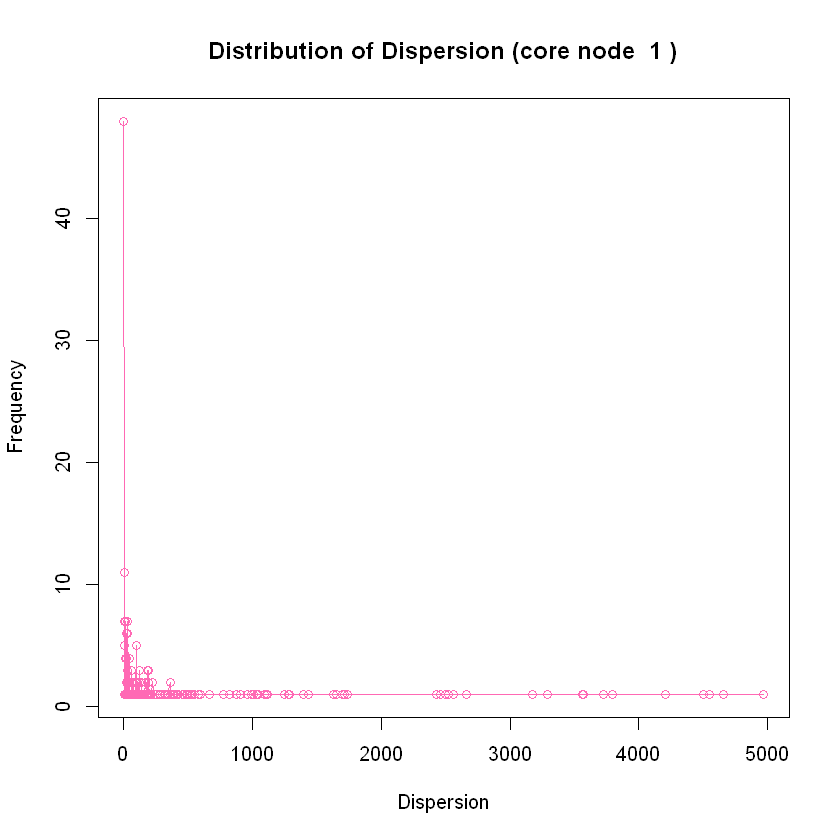

[1] 349
[1] "done finding PN"
[1] "done finding neighbours"


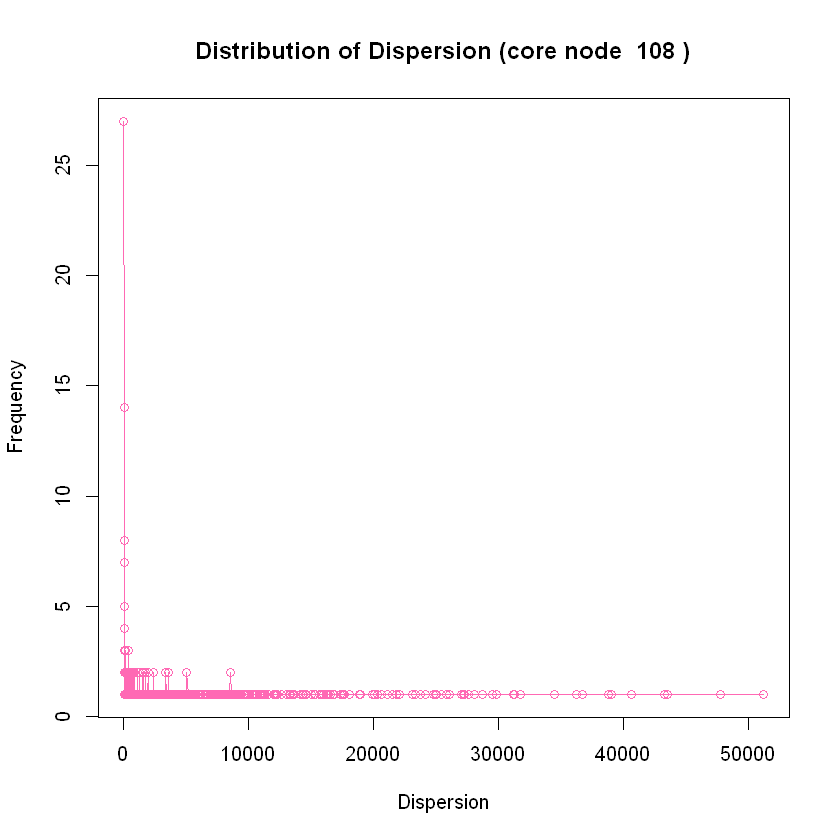

[1] 484
[1] "done finding PN"
[1] "done finding neighbours"


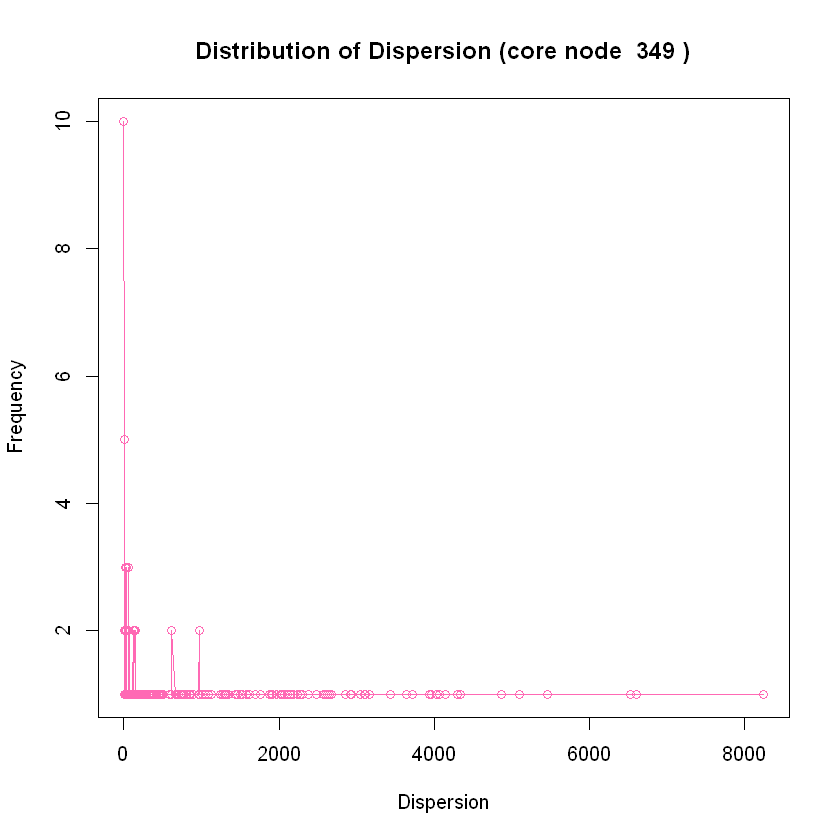

[1] 1087
[1] "done finding PN"
[1] "done finding neighbours"


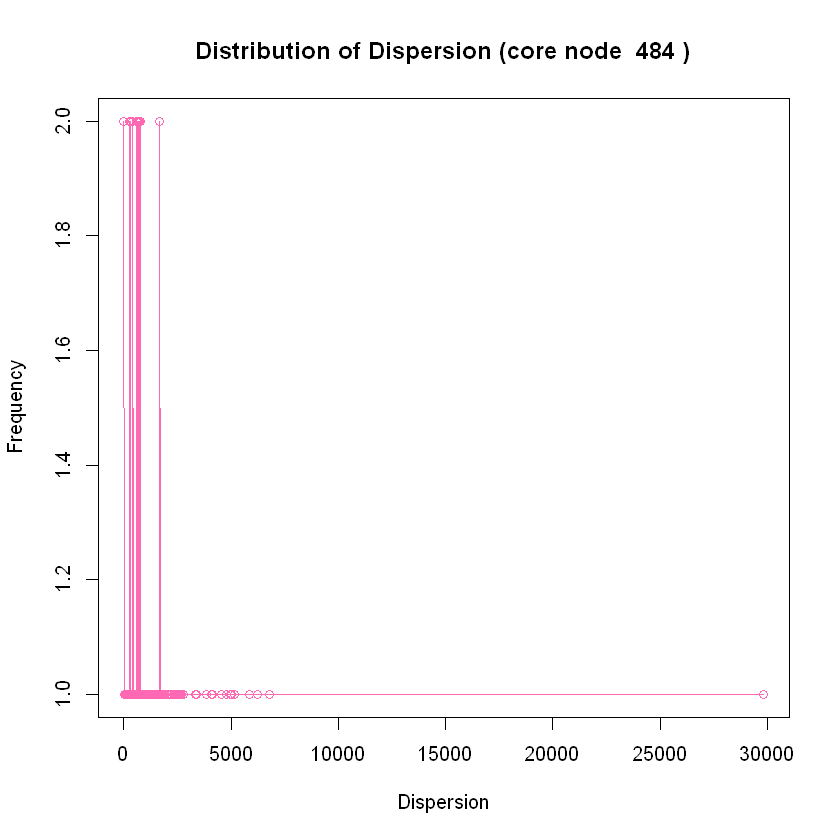

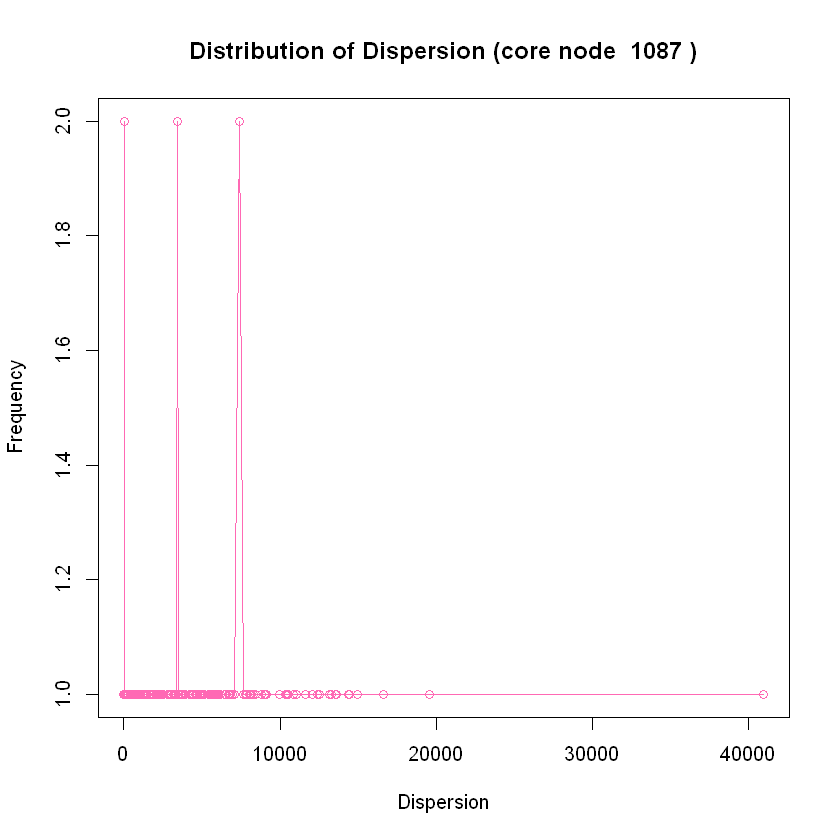

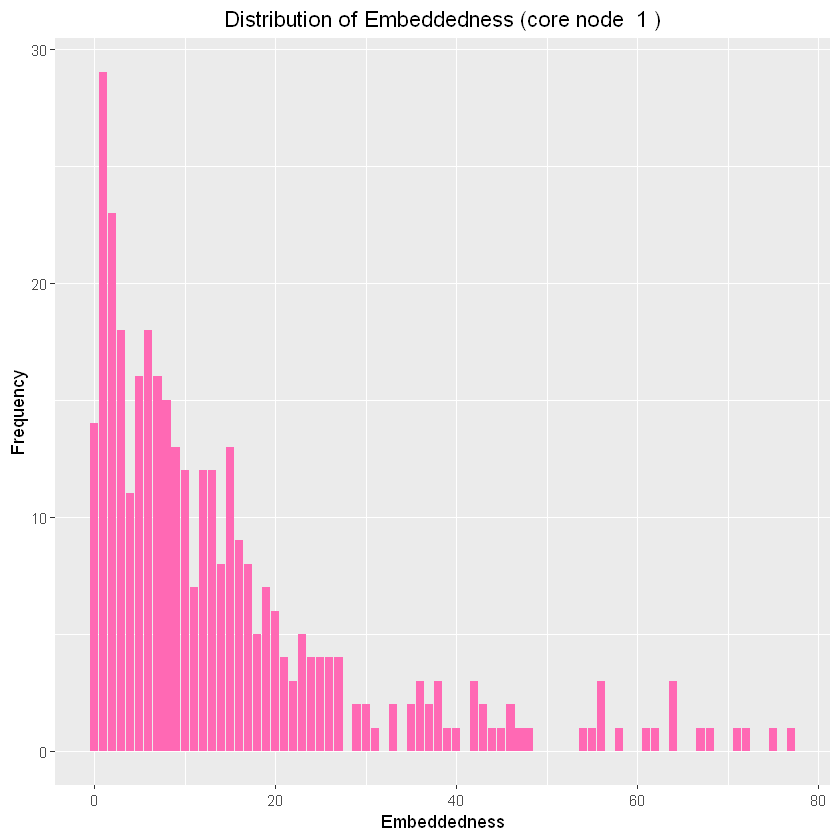

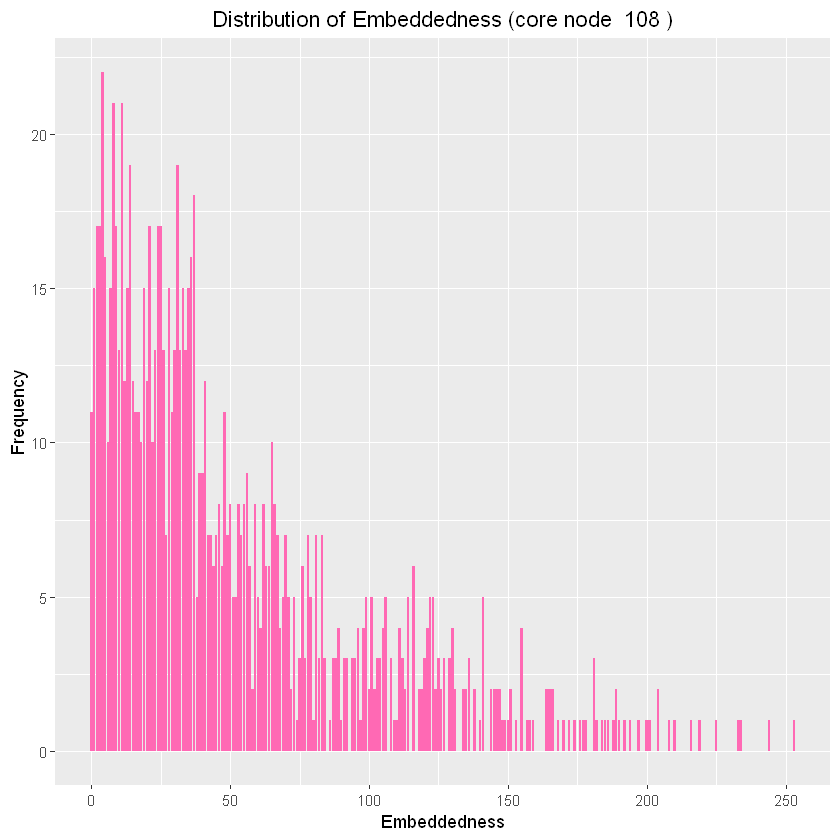

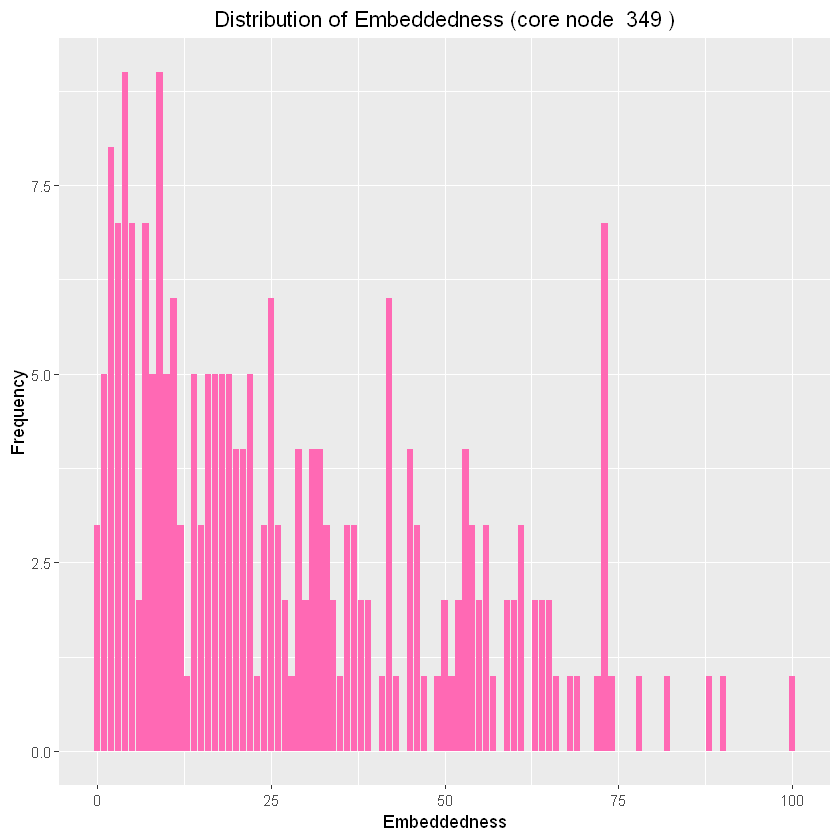

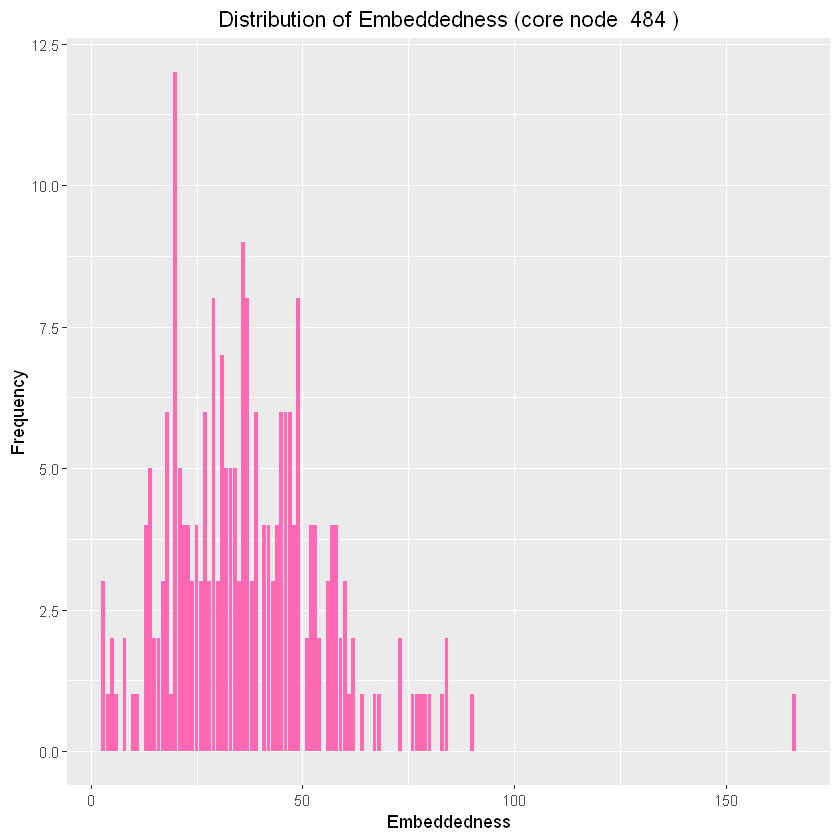

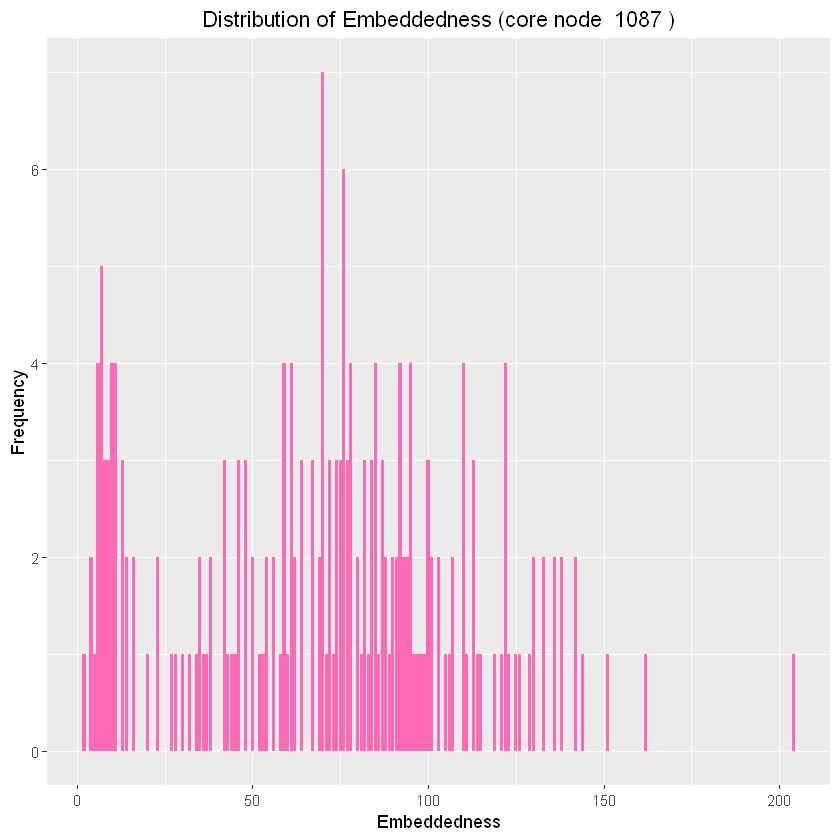

In [37]:
#Question 11
embeds_list <- list()
for (core_node in core_nodes) {
    Origcore <- core_node
    print(core_node)
    
    personal_network <- personalized_network(core_node)
    core_node <- which(V(personal_network)$label == core_node)
    print("done finding PN")

    neighbors <- neighbors(personal_network, core_node, mode="total")
    embeds <- c()
    disps <- c()
    print("done finding neighbours")
    
    for (neighbor in neighbors) {
        cur_embed <- embeddedness(personal_network, neighbor, core_node)
        cur_disp <- dispersion(personal_network, neighbor, core_node)
        embeds <- c(embeds, cur_embed)
        disps <- c(disps, cur_disp)
        #print("done finding single neighbour")
    }

    embeds_df <- count_distribution(embeds)
    disps_df <- count_distribution(disps)
    embeds_list[[length(embeds_list)+1]] <- embeds_df

    plot_disp_distribution(disps_df, Origcore)
}

plot_e_distribution(embeds_list[[1]], core_nodes[1])
plot_e_distribution(embeds_list[[2]], core_nodes[2])
plot_e_distribution(embeds_list[[3]], core_nodes[3])
plot_e_distribution(embeds_list[[4]], core_nodes[4])
plot_e_distribution(embeds_list[[5]], core_nodes[5])


In [16]:
dispersion = function(G, u, v){
    ST = intersection(neighbors(G, u), neighbors(G, v))


    mutual_friends = c()
    for(i in 1:length(ST)){
        mutual_friends = c(mutual_friends, ST[i]$name)
    }
    G_prime = delete_vertices(G, c(u,v))
    dist = distances(G_prime, v=mutual_friends, to=mutual_friends)
    
    total = 0
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
    
    #return (total/2)
}

In [ ]:
i <- 1
for(v in personal_network$label){
    if(v == 1)
        next
    
    mutual_friends = intersection(neighbors(personal_network, 1), neighbors(personal_network, v))
    deleted_graph = delete_vertices(personal_network, c(1, v))
    deleted_graph$label <- deleted_graph$label[!deleted_graph$label %in% c(1, v)]
    print(length(deleted_graph$label))
    if(length(mutual_friends > 1)){
        vertices = c()
        for(x in 1:length(mutual_friends)){
            vertices = c(vertices, which(deleted_graph$label == mutual_friends[x]))
        }
        print(vertices)
        dist <- distances(deleted_graph, v = vertices, to = vertices)
        dist[is.infinite(dist)] <- NA
        dispersion[i] <- sum(dist)
    }
        print("Disp")
        print(dispersion[i])
    i <- i + 1
}